In [14]:
%matplotlib notebook
import scipy.io as scio
from scipy import interpolate
import pylab, socket
import numpy as np
import matplotlib.pyplot as plt
import glob,os
import sys
import matplotlib as mpl
from tikzplotlib import save
import ht

In [15]:
Tfe = 15
Tcs = 30
Tce = 60

L = 3
xi = np.linspace(0,L,100)
Cc,Cf = (500.,2000)
Qc = Cc*(Tce-Tcs)
Qf = Qc
Tfs = Tfe+Qf/Cf
C1 = np.min((Cc,Cf))
C2 = np.max((Cc,Cf))
Cr = C1/C2
Qmax = (Tce-Tfe)*C1
epsilon = Qc/Qmax


In [16]:
epsilon

0.6666666666666666

<IPython.core.display.Javascript object>


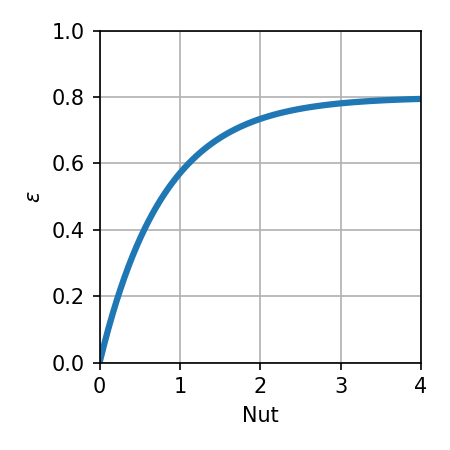

In [17]:
Nuts = np.arange(0.01,6,0.05)
epsilon_p = np.zeros_like(Nuts)
for i,Nut_i in enumerate(np.arange(0.01,6,0.05)):
    epsilon_p[i] = ht.effectiveness_from_NTU(Nut_i,Cr,subtype='parallel')
fig0,ax0 = plt.subplots(figsize=(3,3))
ax0.plot(Nuts,epsilon_p,linewidth=3)

ax0.grid()
ax0.set_ylim([0,1])
ax0.set_xlim([0,4])
ax0.set_ylabel(r'$\varepsilon$')
ax0.set_xlabel('Nut')
fig0.tight_layout()
#fig0.savefig('eficiencia_pp')
save('eficiencia_pp.tikz')

In [18]:
Nut = ht.NTU_from_effectiveness(epsilon,Cr,subtype='counterflow')
UA = C1*Nut


Nutp = ht.NTU_from_effectiveness(epsilon,Cr,subtype='parallel')
UAp = C1*Nutp

In [19]:
Nut,Nutp,Cr

(1.2217209758322065, 1.4334075753824436, 0.25)

In [20]:
def deltaTx(x,Tc0,Tf0,UA,L,Cc,Cf):
    return (Tc0-Tf0)*np.exp(-UA*(1/Cc-1/Cf)*x/L)
    
    

In [21]:
Tcx = np.copy(xi)
Tcx[0] = Tce
for i,xii in enumerate(xi[:-2]):
    Tcx[i+1] = Tcx[0]+ np.trapz(-UA/Cc/L*deltaTx(xi[:i+1],Tce,Tfs,UA,L,Cc,Cf),xi[:i+1])
Tcx[-1]= Tcs

Tfx = np.copy(xi)
Tfx[0] = Tfs
for i,xii in enumerate(xi[:-2]):
    Tfx[i+1] = Tfx[0]+ np.trapz(-UA/Cf/L*deltaTx(xi[:i+1],Tce,Tfs,UA,L,Cc,Cf),xi[:i+1])
Tfx[-1]= Tfe

<IPython.core.display.Javascript object>


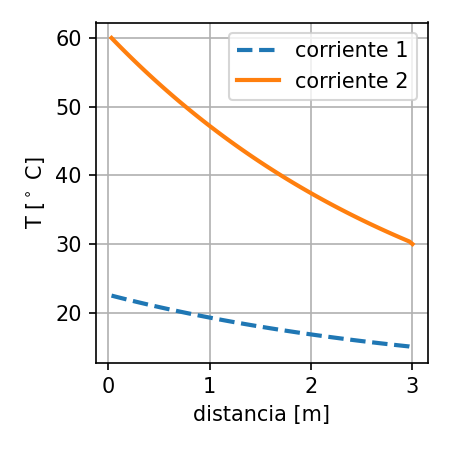

In [22]:
fig0,ax0 = plt.subplots(figsize=(3,3))

ax0.plot(xi[1:],Tfx[1:],label='corriente 1',linestyle ='--',linewidth=2)
ax0.plot(xi[1:],Tcx[1:],label='corriente 2',linewidth=2)
ax0.set_xlabel('distancia [m]')
ax0.set_ylabel(r'T [$^\circ$ C]')
ax0.grid()
ax0.legend();
fig0.tight_layout()

In [30]:
Tcxp = np.copy(xi)
Tcxp[0] = Tce
for i,xii in enumerate(xi[:]):
    Tcxp[i] = Tcxp[0]+ np.trapz(-.7*UAp/Cc/L*deltaTx(xi[:i+1],Tce,Tfe,UAp,L,Cc,Cf),xi[:i+1])
#Tcxp[-1]= Tcs

Tfxp = np.copy(xi)
Tfxp[0] = Tfe
for i,xii in enumerate(xi[:]):
    Tfxp[i] = Tfxp[0]- np.trapz(-UAp/Cf/L*deltaTx(xi[:i+1],Tce,Tfe,UAp,L,Cc,Cf),xi[:i+1])
#Tfxp[-1]= Tfs

<IPython.core.display.Javascript object>


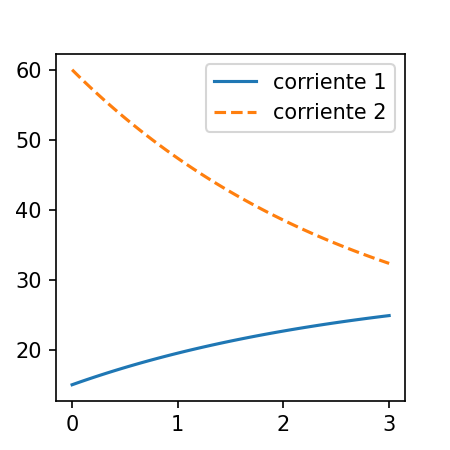

In [36]:
fig0,ax0 = plt.subplots(figsize=(3,3))

#ax0.plot(xi,deltaTx(xi,Tce,Tfe,UA,L,Cc,Cf))
ax0.plot(xi,Tfxp,label= 'corriente 1')
ax0.plot(xi,Tcxp,label='corriente 2',linestyle='--')
ax0.legend()

In [12]:
UAp,UA

(716.7037876912218, 610.8604879161032)

In [13]:

Cc,Cf = (0.1,0.011)


L = 10

Nut = U*A/ C1

Tf_i = np.linspace(Tfs,Tfe,100)
Tc_i = np.linspace(Tce,Tcs,100)
x_i = np.linspace(0,L,100)

deltaTx= np.exp(-U*A*x_i/L*(1/C1-1/C2))*(Tce-Tfs)
deltaTxp= np.exp(-U*A*x_i/L*(1/C1-1/C2))*(Tce-Tfe)

Tf_i = deltaTx+Tfe
Tc_i = deltaTx+Tce

Tf_ip = -deltaTxp+Tfs
Tc_ip = deltaTxp+Tce

NameError: name 'U' is not defined

<IPython.core.display.Javascript object>


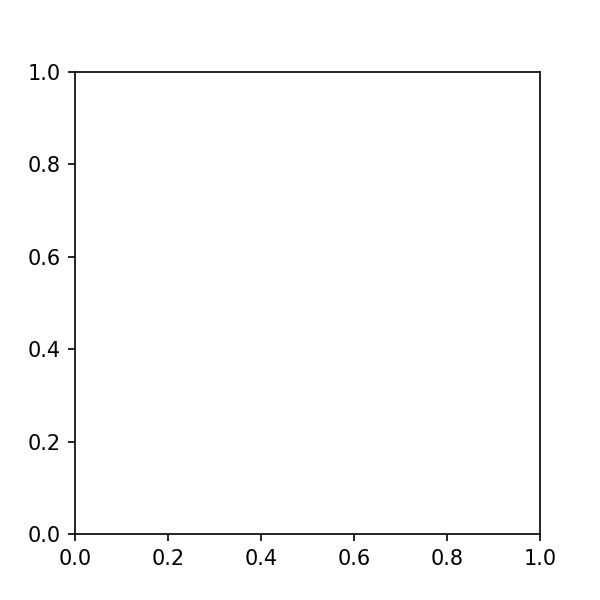

NameError: name 'x_i' is not defined

In [25]:
fig0,ax0 = plt.subplots(figsize=(4,4))
ax0.plot(x_i,Tc_i,label='$T_C$');
ax0.plot(x_i,Tf_i,label = '$T_F$');
ax0.set_xlabel('$x$')
ax0.set_ylabel('$T(x)$ [$^\circ$ C]')
ax0.grid('minor')
ax0.legend()
fig0.tight_layout()

In [ ]:
Tfs

In [ ]:
fig0,ax0 = plt.subplots(figsize=(4,4))
ax0.plot(x_i,Tc_ip,label='$T_C$');
ax0.plot(x_i,Tf_ip,label = '$T_F$');
ax0.set_xlabel('$x$')
ax0.set_ylabel('$T(x)$ [$^\circ$ C]')
ax0.grid('minor')
ax0.legend()
fig0.tight_layout()

In [ ]:
Tfe = 10
Tcs = 40
Tce = 50
epsilon = 0.8
Cc,Cf = (1,.99)
Qc = Cc*(Tce-Tcs)
Qf = Qc
Tfs = Tfe+Qf/Cf
Tm = T
U = 10
A = 10
L = 1
Tf_i = np.linspace(Tfe,Tfs,100)
Tc_i = np.linspace(Tce,Tcs,100)

Qcx = Cc*(Tce-Tc_i)
Qfx = Qcx
Tfx = Tfe+Qfx/Cf

C1 = np.max((Cc,Cf))
C2 = np.min((Cf,Cc))
x_i = np.linspace(0,L,100)
Tf_i = Tc_i-np.exp(-U*A*x_i/L*(1/C2-1/C1))*(Tce-Tfe)

In [ ]:
-np.exp(-U*A*x_i/L*(1/Cc-1/Cf))

In [ ]:
fig0,ax0 = plt.subplots(figsize=(4,4))
ax0.plot(x_i,Tc_i,label='$T_C$');
ax0.plot(x_i,Tf_i,label = '$T_F$');
ax0.set_xlabel('$x$')
ax0.set_ylabel('$T(x)$ [$^\circ$ C]')
ax0.grid('minor')
ax0.legend()
fig0.tight_layout()

In [ ]:
ind_max1 = data[:-10,1].argmax()
ind_min1 = data[10:,1].argmin()+10

p1 = np.polyfit(data[:,0],data[:,1],7)
temps =np.linspace(data[0,0],data[-1,0],100)
curva1 = np.poly1d(p1)

In [ ]:
fig0,ax0 = plt.subplots()
ax0.loglog(data[:,0],data[:,1],'o',linestyle='-',markerfacecolor=colorsk[0],markeredgecolor=colorsk[0],color='k',linewidth=0.2)
ax0.loglog(data[ind_max1,0],data[ind_max1,1],color='darkblue',marker='o',markersize=10,markerfacecolor='none',markeredgewidth=2)
ax0.loglog(data[ind_min1,0],data[ind_min1,1],color='darkblue',marker='o',markersize=10,markerfacecolor='none',markeredgewidth=2)
ax0.grid(which='minor')
ax0.set_xlabel(r'$\Delta T$ K')
ax0.set_ylabel(r'Flujo de calor $\dot q$ kW/m$^2$')
fig0.tight_layout()
tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/ebullicion/tikzs/curva_ebullicion1.tikz')

In [ ]:
fig1,ax1 = plt.subplots()
ax1.plot(temps,curva1(temps),'k')

In [ ]:
i